# Capstone Project - The Battle of Neighborhoods (Week 2)

## Introduction/Business Problem
 
Toronto, being the largest city in Canada, is composed of 10 boroughs.  Finding the best neighbourhood to live for one is subjective.  What one may think of the greatest neighbourhood, another may not agree. The decision may be different from one to another depending on factors and priorities, such as how important the safety and amenities is.   It may be quite daunting for the new comers to find and decide on a suitable neighborhood to settle down.   We are targeting the new comers who are interested in the an area that meets the following criteria:
 
- A neighbourhood with the lowest crime rate.
- A neighbourhood with some recreational parks.
- A neighbourhood with restaurants, bars, and etc.
- A neighbourhood with above average population.
 
With the identified criteria, the objective is to help the them to learn about some of the best neighborhoods in Toronto and make recommendation to them what neighborhoods will be the choices to consider.  The information collected will assist the target audience in choosing the suitable area to live in Toronto by providing data about the crime rate of each neighborhood and nearby amenities such as established venues.

## Data
In order to solve the problem, data will be obtained from the sources below.  Since the datasets we use contains information that would not be needed to resolve our problem, we have gone through the data cleaning exercises to form the dataset that would be appropriate for our analysis.

**1. Toronto Neighborhoods via City of Toronto's Open Data Portal**
_Source_: https://open.toronto.ca/dataset/neighbourhoods/
_Description_: We will get the Boundaries of City of Toronto Neighbourhoods which contains neighbourhoods, ladtitudes and longitudes.  Then use Nominatim class to obtain all the postal codes from the address of the raw data for each neighbourhoods.

**2. List of neighbourhoods in Toronto via Wickipedia**
_Source_: https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M) 
_Description_: After scraping and parsing the data, we will extract the boroughs and added to toronto_df based on the Postal Code.

**3. Neighborhood Crime Rate via Toronto Public Service Public Safety Data Portal**
_Source_: https://open.toronto.ca/dataset/wellbeing-toronto-safety/     
_Description_: We will download the file (in CSV format) that includes 2014-2018 Crime Data by Neighbourhood and collect the 4 year average and crime rates per 100,000 people by neighbourhood based on 2016 Census Population are available for Assault, Auto Theft, Break and Enter, Robbery, Theft Over and Homicide. Then parsing the dataset to form a new dataframe that contains both the neighborhoods, the coordinates, the crime data and population.

**4. Toronto Neighborhoods Venue Data**
_Source_: FourSquare API
_Description_: We will retrieve the venues in those boroughs that are considered as the top 3 safest areas in Toronto and use k-means clusters to explore the neighborhoods.  Then further narrow down to the top 3 safest neighborhoods, retrieve the venues in teh 3 neighborhoods and filter on the parks, restaurants and bars so that we can compare number of the 3 venue categories in each neighborhood.

**Datasource 1. Boundaries of City of Toronto Neighborhoods via City of Toronto's Open Data Portal**(https://open.toronto.ca/dataset/neighbourhoods/)
The file contains the neighbourhoods and geographic coordinates.

- **_Get the dataset_**

In [1]:
import pandas as pd
import requests

# Get the dataset metadata by passing package_id to the package_search endpoint
# For example, to retrieve the metadata for this dataset:

url = "https://ckan0.cf.opendata.inter.prod-toronto.ca/api/3/action/package_show"
params = { "id": "4def3f65-2a65-4a4f-83c4-b2a4aed72d46"}
package = requests.get(url, params = params).json()
print(package["result"])

# Get the data by passing the resource_id to the datastore_search endpoint
# See https://docs.ckan.org/en/latest/maintaining/datastore.html for detailed parameters options
# For example, to retrieve the data content for the first resource in the datastore:

for idx, resource in enumerate(package["result"]["resources"]):
    if resource["datastore_active"]:
        url = "https://ckan0.cf.opendata.inter.prod-toronto.ca/api/3/action/datastore_search"
        p = { "id": resource["id"] }
        data = requests.get(url, params = p).json()
        df = pd.DataFrame(data["result"]["records"])
        break
df.head()

{'license_title': 'Open Government Licence – Toronto', 'owner_unit': None, 'relationships_as_object': [], 'topics': 'Locations and mapping', 'owner_email': 'opendata@toronto.ca', 'excerpt': 'Boundaries of Toronto Neighbourhoods.', 'private': False, 'owner_division': 'Social Development, Finance & Administration', 'num_tags': 9, 'id': '4def3f65-2a65-4a4f-83c4-b2a4aed72d46', 'metadata_created': '2019-07-23T17:47:38.364157', 'refresh_rate': 'As available', 'title': 'Neighbourhoods', 'license_url': 'https://open.toronto.ca/open-data-license/', 'state': 'active', 'information_url': 'http://www.toronto.ca/demographics/neighbourhoods.htm', 'license_id': 'open-government-licence-toronto', 'type': 'dataset', 'resources': [{'cache_last_updated': None, 'package_id': '4def3f65-2a65-4a4f-83c4-b2a4aed72d46', 'datastore_active': True, 'id': 'a083c865-6d60-4d1d-b6c6-b0c8a85f9c15', 'size': None, 'format': 'GeoJSON', 'state': 'active', 'hash': '', 'description': '', 'is_preview': True, 'last_modified': 

,_id,AREA_ID,AREA_ATTR_ID,PARENT_AREA_ID,AREA_SHORT_CODE,AREA_LONG_CODE,AREA_NAME,AREA_DESC,X,Y,LONGITUDE,LATITUDE,OBJECTID,Shape__Area,Shape__Length,geometry
0,6861,25886861,25926662,49885,094,094,Wychwood (94),Wychwood (94),None,None,-79.425515,43.676919,16491505,3.217960e+06,7515.779658,"{""type"": ""Polygon"", ""coordinates"": [[[-79.4359..."
1,6862,25886820,25926663,49885,100,100,Yonge-Eglinton (100),Yonge-Eglinton (100),None,None,-79.403590,43.704689,16491521,3.160334e+06,7872.021074,"{""type"": ""Polygon"", ""coordinates"": [[[-79.4109..."
2,6863,25886834,25926664,49885,097,097,Yonge-St.Clair (97),Yonge-St.Clair (97),None,None,-79.397871,43.687859,16491537,2.222464e+06,8130.411276,"{""type"": ""Polygon"", ""coordinates"": [[[-79.3911..."
3,6864,25886593,25926665,49885,027,027,York University Heights (27),York University Heights (27),None,None,-79.488883,43.765736,16491553,2.541821e+07,25632.335242,"{""type"": ""Polygon"", ""coordinates"": [[[-79.5052..."
4,6865,25886688,25926666,49885,031,031,Yorkdale-Glen Park (31),Yorkdale-Glen Park (31),None,None,-79.457108,43.714672,16491569,1.156669e+07,13953.408098,"{""type"": ""Polygon"", ""coordinates"": [[[-79.4396..."


- **_Cleaning Data_** by dropping the columns that will not be used, splitting the AREA_NAME column to Neighborhood and Neighborhood ID for later merging with the crime data.

In [2]:
# Drop all columns except for AREA_SHORT_CODE (aka Neighborhood ID), Area Name, Logititude and Lattitude
toronto_df = df
toronto_df.drop(['_id', 'AREA_ID', 'AREA_ATTR_ID', 'PARENT_AREA_ID', 'AREA_LONG_CODE', 'AREA_DESC', 'X', 'Y', 'OBJECTID', 'Shape__Area', 'Shape__Length', 'geometry'], axis=1, inplace=True)
toronto_df.head()

,AREA_SHORT_CODE,AREA_NAME,LONGITUDE,LATITUDE
0,094,Wychwood (94),-79.425515,43.676919
1,100,Yonge-Eglinton (100),-79.403590,43.704689
2,097,Yonge-St.Clair (97),-79.397871,43.687859
3,027,York University Heights (27),-79.488883,43.765736
4,031,Yorkdale-Glen Park (31),-79.457108,43.714672


In [3]:
import numpy as np

# Splite Area_Name column to Neighborhood and Neighborhood ID.
new = toronto_df['AREA_NAME'].str.split("(", n = 1, expand = True)
toronto_df['Neighborhood'] = new[0]
toronto_df['Neighborhood'] = toronto_df['Neighborhood'].str.rstrip()
toronto_df['Area_ID'] = new[1]

toronto_df.drop(columns =["AREA_NAME"], inplace = True)

# Convert Area_Short_Code to Numberic and rename the column to Neighborhood_ID
#toronto_df['AREA_SHORT_CODE'] = pd.to_numeric(toronto_df['AREA_SHORT_CODE'])
toronto_df.rename(columns = {'AREA_SHORT_CODE':'Neighborhood_ID'}, inplace = True)
toronto_df['Neighborhood'] = np.where((toronto_df.Neighborhood == "Mimico"), 'Mimico (includes Humber Bay Shores)', toronto_df.Neighborhood)
toronto_df.drop(columns =["Area_ID"], inplace = True)

toronto_df = toronto_df[['Neighborhood_ID', 'Neighborhood', 'LONGITUDE', 'LATITUDE']]
toronto_df.head()

,Neighborhood_ID,Neighborhood,LONGITUDE,LATITUDE
0,094,Wychwood,-79.425515,43.676919
1,100,Yonge-Eglinton,-79.403590,43.704689
2,097,Yonge-St.Clair,-79.397871,43.687859
3,027,York University Heights,-79.488883,43.765736
4,031,Yorkdale-Glen Park,-79.457108,43.714672


In [4]:
# Dataset import was not complete as out of a total of 140 records, only first 100 were imported.
# toronto_df.drop(toronto_df.index[115], inplace=True)
data = pd.read_csv('additional.csv')
data['Neighborhood_ID'] = data['Neighborhood_ID'].astype(str)

nextIndex = 100

for i, row in data.iterrows():
    toronto_df.loc[nextIndex] = row
    nextIndex = nextIndex + 1

toronto_df.tail(42)

/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,Neighborhood_ID,Neighborhood,LONGITUDE,LATITUDE
98,120,Clairlea-Birchmount,-79.281382,43.713592
99,033,Clanton Park,-79.446303,43.741978
100,123,Cliffcrest,-79.235530,43.721121
101,92,Corso Italia-Davenport,-79.447469,43.677661
102,66,Danforth,-79.329819,43.684025
103,59,Danforth East York,-79.331403,43.689468
104,47,Don Valley Village,-79.353644,43.783294
105,126,Dorset Park,-79.278908,43.759274
106,93,Dovercourt-Wallace Emerson-Junction,-79.438541,43.665677
107,26,Downsview-Roding-CFB,-79.490497,43.733292


- **_Use Nominatim class to get the Postal code using the geographic coordinates of each neighborhood._**

In [5]:
pip install geocoder

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


- **_Merge both Boundaries and Geographic Coordinates._**

In [8]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

locator = Nominatim(user_agent='myGeocoder')

In [9]:
# find Toronto geographical coordinates
location = locator.geocode('Toronto, ON, Canada')
print("Geographical coordinates of Toronto: Latitude = {}, Longitude = {}".format(location.latitude, location.longitude))

Geographical coordinates of Toronto: Latitude = 43.6534817, Longitude = -79.3839347


In [10]:
# get all the postal codes based on the geographical coordinates of all the neighborhoods.
import sys

toronto_df.insert(4, "Postal_Code", "")

for index, row in toronto_df.iterrows():
    try:
        geocoordinate = str(row['LATITUDE']) + "," + str(row['LONGITUDE'])
        location1 = locator.reverse(geocoordinate)
        toronto_df.loc[index,'Postal_Code'] = location1.raw['address']['postcode'][0:3]  
    except:
        print('Error, ', sys.exc_info()[0], 'occured for ', row['Neighborhood_ID'], ', Geo coordinates: ', str(row['LATITUDE']) + "," + str(row['LONGITUDE']))
        print('Next')

toronto_df.tail()

/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Error,  <class 'KeyError'> occured for  127 , Geo coordinates:  43.7603663086,-79.2574003723
Next


,Neighborhood_ID,Neighborhood,LONGITUDE,LATITUDE,Postal_Code
135,124,Kennedy Park,-79.260382,43.725556,M1K
136,78,Kensington-Chinatown,-79.397240,43.653554,M5T
137,6,Kingsview Village-The Westway,-79.547863,43.698993,M9P
138,15,Kingsway South,-79.510577,43.653520,M8X
139,117,L'Amoreaux,-79.314084,43.795716,M1W


In [11]:
# Handle rows that had errors
# Check if postcode is missing
geocoordinate = '43.7603663086,-79.2574003723'
location1 = locator.reverse(geocoordinate)
print(location1.raw)

{'place_id': 235640930, 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. https://osm.org/copyright', 'osm_type': 'relation', 'osm_id': 2147802, 'lat': '43.7618961', 'lon': '-79.26145522724084', 'display_name': 'West Highland Creek, Stokewell Place, Scarborough Centre, Bendale, Scarborough, Toronto, Golden Horseshoe, Ontario, Canada', 'address': {'natural': 'West Highland Creek', 'road': 'Stokewell Place', 'quarter': 'Scarborough Centre', 'neighbourhood': 'Bendale', 'suburb': 'Scarborough', 'city': 'Scarborough', 'state_district': 'Golden Horseshoe', 'state': 'Ontario', 'country': 'Canada', 'country_code': 'ca'}, 'boundingbox': ['43.7582476', '43.7655384', '-79.2658007', '-79.25']}


In [12]:
# ensure Neighborhood_ID column is an int type.
toronto_df['Neighborhood_ID'] = toronto_df['Neighborhood_ID'].astype(int)

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [13]:
# Find the specific record for Neighborhood ID, 127
# Search for the geo coordinates on Geocoder.com to find the postal code since it is missing from the address.
toronto_df.loc[toronto_df.Neighborhood_ID == 127, 'Postal_Code'] = 'M1P'
toronto_df.loc[toronto_df.Neighborhood_ID == 127]

/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,Neighborhood_ID,Neighborhood,LONGITUDE,LATITUDE,Postal_Code
85,127,Bendale,-79.2574,43.760366,M1P


**Datasource 4. List of neighbourhoods in Toronto via Wickipedia** (https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M)
This contains all boroughs and neighborhoods with postal codes starting with M.  After scraping and parsing the data, we will extract the borough and added to toronto_df.

- **Use BeautifulSoup library to parse Wickipedia Toronto Neighborhoods, find the right table and build the data frame, and then merge it with the dataframe we have obtained earlier to form the Toronto neighborhoods, geo coordinates and borough**

In [14]:
# import the library we use to open URLs
import urllib.request

# specify which URL/web page we are going to be scraping
url = "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"

# open the url using urllib.request and put the HTML into the page variable
page = urllib.request.urlopen(url)

# import the BeautifulSoup library so we can parse HTML and XML documents
from bs4 import BeautifulSoup

# parse the HTML from our URL into the BeautifulSoup parse tree format
soup = BeautifulSoup(page, "lxml")

In [15]:
# use the 'find_all' function to bring back all instances of the 'table' tag in the HTML and store in 'all_tables' variable
all_tables=soup.find_all("table")

# find the right table
right_table=soup.find('table', class_='wikitable sortable')

In [16]:
# parse the table and get the content with the line break stripped and filtered out 'Not assigned' boroughs
PostalCode = []
Borough = []
Neighborhood = []

for row in right_table.findAll('tr'):
    cells=row.findAll('td')
    if len(cells)==3:
        # Ignore cells with a borough that is Not assigned.
        if cells[1].find(text=True).strip('\n') != 'Not assigned':
            PostalCode.append(cells[0].find(text=True).strip('\n'))
            Borough.append(cells[1].find(text=True).strip('\n'))
            Neighborhood.append(cells[2].find(text=True).strip('\n'))

In [17]:
# put the lists into a dataframe
to_borough_df=pd.DataFrame(PostalCode,columns=['Postal_Code'])
to_borough_df['Borough']=Borough
to_borough_df['Neighborhood']=Neighborhood
to_borough_df

,Postal_Code,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Downtown Toronto,"Queen's Park, Ontario Provincial Government"
...,...,...,...
98,M8X,Etobicoke,"The Kingsway, Montgomery Road, Old Mill North"
99,M4Y,Downtown Toronto,Church and Wellesley
100,M7Y,East Toronto,"Business reply mail Processing Centre, South C..."
101,M8Y,Etobicoke,"Old Mill South, King's Mill Park, Sunnylea, Hu..."


In [18]:
# merged the tables so we have Boroughs for each neighborhood
# drop Neighborhood from to_borough_df and then merge to toronto_df
to_borough_df.drop(['Neighborhood'], axis=1, inplace=True)
to_merged_df = pd.merge(toronto_df, to_borough_df, on='Postal_Code')
to_merged_df

,Neighborhood_ID,Neighborhood,LONGITUDE,LATITUDE,Postal_Code,Borough
0,94,Wychwood,-79.425515,43.676919,M6G,Downtown Toronto
1,80,Palmerston-Little Italy,-79.418409,43.659157,M6G,Downtown Toronto
2,110,Keelesdale-Eglinton West,-79.471437,43.685727,M6G,Downtown Toronto
3,100,Yonge-Eglinton,-79.403590,43.704689,M4R,Central Toronto
4,103,Lawrence Park South,-79.406039,43.717212,M4R,Central Toronto
...,...,...,...,...,...,...
135,21,Humber Summit,-79.556175,43.758920,M9L,North York
136,106,Humewood-Cedarvale,-79.427683,43.691370,M6C,York
137,125,Ionview,-79.272470,43.735364,M1K,Scarborough
138,124,Kennedy Park,-79.260382,43.725556,M1K,Scarborough


**Datasource 3. Neighborhood Crime Rate via Toronto Public Service Public Safety Data Portal** ( https://open.toronto.ca/dataset/wellbeing-toronto-safety/)
This file (in CSV format) contains 2014-2018 Crime Data by Neighbourhood and collect the 4 year average and crime rates per 100,000 people by neighbourhood based on 2016 Census Populationare available for Assault, Auto Theft, Break and Enter, Robbery, Theft Over and Homicide.

- **_Read Toronto 2014 - 2018 Crime Data by Neighborhoods and merge to collect the 4 year average crime data_**

In [19]:
# read Toronto Neighbourhood Crime Rates csv file
crime_df = pd.read_csv('Neighbourhood_Crime_Rates_(Boundary_File)_.csv')
crime_df.head()

,OBJECTID,Neighbourhood,Hood_ID,Population,Assault_2014,Assault_2015,Assault_2016,Assault_2017,Assault_2018,Assault_2019,...,TheftOver_2015,TheftOver_2016,TheftOver_2017,TheftOver_2018,TheftOver_2019,TheftOver_AVG,TheftOver_CHG,TheftOver_Rate_2019,Shape__Area,Shape__Length
0,1,Yonge-St.Clair,97,12528,20,29,39,27,34,37,...,5,8,0,3,6,4.3,1.00,47.9,1.161315e+06,5873.270582
1,2,York University Heights,27,27593,271,296,361,344,357,370,...,46,37,39,38,28,36.3,-0.26,101.5,1.324666e+07,18504.777326
2,3,Lansing-Westgate,38,16164,44,80,68,85,75,72,...,5,5,11,6,11,7.0,0.83,68.1,5.346186e+06,11112.109625
3,4,Yorkdale-Glen Park,31,14804,106,136,174,161,175,209,...,14,26,23,20,29,22.5,0.45,195.9,6.038326e+06,10079.426920
4,5,Stonegate-Queensway,16,25051,88,71,76,95,87,82,...,8,4,6,7,4,6.0,-0.43,16.0,7.946202e+06,11853.189878


In [20]:
# rename Hood_ID to Neighborhood_ID
crime_df.rename(columns = {'Hood_ID':'Neighborhood_ID'}, inplace = True)
crime_df.dtypes

OBJECTID                     int64
Neighbourhood               object
Neighborhood_ID              int64
Population                   int64
Assault_2014                 int64
Assault_2015                 int64
Assault_2016                 int64
Assault_2017                 int64
Assault_2018                 int64
Assault_2019                 int64
Assault_AVG                float64
Assault_CHG                float64
Assault_Rate_2019          float64
AutoTheft_2014               int64
AutoTheft_2015               int64
AutoTheft_2016               int64
AutoTheft_2017               int64
AutoTheft_2018               int64
AutoTheft_2019               int64
AutoTheft_AVG              float64
AutoTheft_CHG              float64
AutoTheft_Rate_2019        float64
BreakandEnter_2014           int64
BreakandEnter_2015           int64
BreakandEnter_2016           int64
BreakandEnter_2017           int64
BreakandEnter_2018           int64
BreakandEnter_2019           int64
BreakandEnter_AVG   

- **_Cleaning Data_** _by dropping the columns that will not be used._

In [21]:
# drop all columns that we will not be using for analysis.
crime_df.drop(['Assault_2014', 'Assault_2015', 'Assault_2016', 'Assault_2017', 'Assault_2018', 'Assault_2019', 'Assault_CHG', 'Assault_Rate_2019'], axis=1, inplace=True)
crime_df.drop(['AutoTheft_2014', 'AutoTheft_2015', 'AutoTheft_2016', 'AutoTheft_2017', 'AutoTheft_2018', 'AutoTheft_2019', 'AutoTheft_CHG', 'AutoTheft_Rate_2019'], axis=1, inplace=True)
crime_df.drop(['BreakandEnter_2014', 'BreakandEnter_2015', 'BreakandEnter_2016', 'BreakandEnter_2017', 'BreakandEnter_2018', 'BreakandEnter_2019', 'BreakandEnter_CHG', 'BreakandEnter_Rate_2019'], axis=1, inplace=True)
crime_df.drop(['Homicide_2014', 'Homicide_2015', 'Homicide_2016', 'Homicide_2017', 'Homicide_2018', 'Homicide_2019', 'Homicide_CHG', 'Homicide_Rate_2019'], axis=1, inplace=True)
crime_df.drop(['Robbery_2014', 'Robbery_2015', 'Robbery_2016', 'Robbery_2017', 'Robbery_2018', 'Robbery_2019', 'Robbery_CHG', 'Robbery_Rate_2019'], axis=1, inplace=True)
crime_df.drop(['TheftOver_2014', 'TheftOver_2015', 'TheftOver_2016', 'TheftOver_2017', 'TheftOver_2018', 'TheftOver_2019', 'TheftOver_CHG', 'TheftOver_Rate_2019'], axis=1, inplace=True)
crime_df.drop(['OBJECTID', 'Neighbourhood','Shape__Area', 'Shape__Length'], axis=1, inplace=True)
crime_df.dtypes

Neighborhood_ID        int64
Population             int64
Assault_AVG          float64
AutoTheft_AVG        float64
BreakandEnter_AVG    float64
Homicide_AVG         float64
Robbery_AVG          float64
TheftOver_AVG        float64
dtype: object

- **Merge Crime Data with Neighborhood Data**

In [22]:
# rename columns in preparation for the bar diagram labels
to_crime_df = pd.merge(to_merged_df, crime_df, on='Neighborhood_ID')
# Rename crime type column headings
to_crime_df.rename(columns = {'Assault_AVG':'Assault'}, inplace = True)
to_crime_df.rename(columns = {'AutoTheft_AVG':'Auto Theft'}, inplace = True)
to_crime_df.rename(columns = {'BreakandEnter_AVG':'Break and Enter'}, inplace = True)
to_crime_df.rename(columns = {'Homicide_AVG':'Homicide'}, inplace = True)
to_crime_df.rename(columns = {'Robbery_AVG':'Robbery'}, inplace = True)
to_crime_df.rename(columns = {'TheftOver_AVG':'Theft Over'}, inplace = True)

to_crime_df = to_crime_df[['Borough', 'Neighborhood_ID', 'Neighborhood', 'Postal_Code', 'LONGITUDE','LATITUDE', 'Population', 'Assault', 'Auto Theft', 'Break and Enter', 'Homicide', 'Robbery', 'Theft Over']]
to_crime_df

,Borough,Neighborhood_ID,Neighborhood,Postal_Code,LONGITUDE,LATITUDE,Population,Assault,Auto Theft,Break and Enter,Homicide,Robbery,Theft Over
0,Downtown Toronto,94,Wychwood,M6G,-79.425515,43.676919,14349,70.2,13.2,34.0,0.3,13.8,2.3
1,Downtown Toronto,80,Palmerston-Little Italy,M6G,-79.418409,43.659157,13826,86.0,14.0,45.3,0.0,22.2,8.0
2,Downtown Toronto,110,Keelesdale-Eglinton West,M6G,-79.471437,43.685727,11058,63.0,22.0,20.0,0.5,22.7,3.2
3,Central Toronto,100,Yonge-Eglinton,M4R,-79.403590,43.704689,11817,75.8,9.0,28.0,0.3,19.5,4.8
4,Central Toronto,103,Lawrence Park South,M4R,-79.406039,43.717212,15179,22.7,22.3,50.2,0.0,5.7,3.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,North York,21,Humber Summit,M9L,-79.556175,43.758920,12416,104.3,82.3,48.7,1.2,25.7,17.3
136,York,106,Humewood-Cedarvale,M6C,-79.427683,43.691370,14365,46.3,16.2,32.5,0.3,7.8,4.7
137,Scarborough,125,Ionview,M1K,-79.272470,43.735364,13641,94.2,6.5,26.8,0.0,13.3,2.3
138,Scarborough,124,Kennedy Park,M1K,-79.260382,43.725556,17123,219.3,22.0,45.0,0.5,46.8,7.3


- **_Find the average population and crime rate of Toronto neighborhoods_**

In [23]:
to_crime_df.describe()

,Neighborhood_ID,LONGITUDE,LATITUDE,Population,Assault,Auto Theft,Break and Enter,Homicide,Robbery,Theft Over
count,140.0000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,70.5000,-79.400186,43.708841,19511.221429,132.646429,27.835000,51.548571,0.513571,25.647143,8.082857
std,40.5586,0.102044,0.051274,10033.589222,128.977375,35.047468,36.760413,0.517911,23.220601,9.427947
min,1.0000,-79.596356,43.592362,6577.000000,18.500000,2.700000,10.500000,0.000000,3.300000,1.200000
25%,35.7500,-79.479794,43.671009,12019.500000,59.425000,13.275000,28.000000,0.200000,11.675000,3.500000
50%,70.5000,-79.403989,43.702021,16749.500000,96.500000,18.800000,40.750000,0.300000,20.100000,5.200000
75%,105.2500,-79.331097,43.747294,23854.500000,160.200000,30.975000,64.450000,0.725000,30.400000,8.350000
max,140.0000,-79.150843,43.821201,65913.000000,851.800000,366.700000,247.300000,2.500000,135.700000,56.200000


In [24]:
print("Average Population of Toronto Neighborhoods: {}".format(to_crime_df['Population'].mean()))

Average Population of Toronto Neighborhoods: 19511.22142857143


In [25]:
po_above_avg_df = to_crime_df.loc[to_crime_df['Population'] >= to_crime_df['Population'].mean()]
print("{} Neighborhoods have population above the average population of all Toronto Neighborhoods.".format(po_above_avg_df.shape[0]))

55 Neighborhoods have population above the average population of all Toronto Neighborhoods.


In [27]:
# Sort columns by Borough and Postal Code
po_above_avg_df.sort_values(by=['Borough', 'Postal_Code'], ascending=True, inplace=True)

po_above_avg_df

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Borough,Neighborhood_ID,Neighborhood,Postal_Code,LONGITUDE,LATITUDE,Population,Assault,Auto Theft,Break and Enter,Homicide,Robbery,Theft Over
41,Central Toronto,104,Mount Pleasant West,M4S,-79.393360,43.704435,29658,115.5,7.8,72.5,0.5,13.7,6.0
66,Downtown Toronto,98,Rosedale-Moore Park,M4W,-79.379669,43.682820,20923,98.3,17.7,69.2,0.2,18.0,9.5
32,Downtown Toronto,73,Moss Park,M5A,-79.367297,43.656518,20506,474.7,30.2,148.5,2.5,125.5,18.8
34,Downtown Toronto,70,South Riverdale,M5A,-79.335651,43.649292,27876,244.3,30.8,108.8,1.8,49.0,21.3
98,Downtown Toronto,75,Church-Yonge Corridor,M5B,-79.379017,43.659649,31340,642.8,37.8,188.5,2.0,135.7,33.8
89,Downtown Toronto,76,Bay Street Corridor,M5G,-79.385721,43.657511,25797,771.0,32.8,158.7,1.5,121.3,52.3
79,Downtown Toronto,77,Waterfront Communities-The Island,M5J,-79.377202,43.633880,65913,851.8,53.7,247.3,1.0,82.2,56.2
86,Downtown Toronto,95,Annex,M5T,-79.404001,43.671585,30526,246.3,22.0,147.5,0.5,40.8,29.5
73,East Toronto,63,The Beaches,M4L,-79.299601,43.671050,21567,93.8,16.3,49.3,0.0,20.3,6.2
75,East York,55,Thorncliffe Park,M4H,-79.349984,43.707749,21108,97.5,9.3,25.5,1.5,11.0,7.2


In [26]:
print('Average crime rate by Borough of the 54 neighborhoods that have above average population:')
avg_crime_by_borough_df = po_above_avg_df.groupby('Borough')['Assault', 'Auto Theft', 'Break and Enter', 'Homicide', 'Robbery', 'Theft Over'].mean()

Average crime rate by Borough of the 54 neighborhoods that have above average population:


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


**_Find the average crime rate by Borough of all Toronto Neighborhoods_**

In [27]:
print('Average crime rate by Borough of all Toronto neighborhoods:')
avg_crime_by_borough_df = to_crime_df.groupby('Borough')['Assault', 'Auto Theft', 'Break and Enter', 'Homicide', 'Robbery', 'Theft Over'].mean()
avg_crime_by_borough_df

Average crime rate by Borough of all Toronto neighborhoods:


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Assault,Auto Theft,Break and Enter,Homicide,Robbery,Theft Over
Borough,,,,,,
Central Toronto,52.350000,11.400000,41.380000,0.130000,9.440000,4.860000
Downtown Toronto,307.064286,24.142857,105.878571,1.007143,54.457143,19.864286
East Toronto,91.750000,11.975000,39.375000,0.300000,16.987500,4.437500
East York,77.287500,9.162500,29.950000,0.575000,13.425000,4.087500
Etobicoke,98.285000,48.115000,39.975000,0.575000,22.615000,8.345000
North York,116.506250,34.856250,46.900000,0.415625,21.778125,8.425000
Scarborough,164.504000,29.352000,60.512000,0.584000,33.120000,7.084000
West Toronto,129.454545,17.581818,53.690909,0.445455,23.472727,6.536364
York,97.108333,22.575000,30.200000,0.433333,21.258333,4.266667


In [29]:
# sum the totoal of average crime rate
avg_crime_by_borough_df['Total Crime'] = list(avg_crime_by_borough_df.sum(axis = 1, skipna = True))
avg_crime_by_borough_df

,Assault,Auto Theft,Break and Enter,Homicide,Robbery,Theft Over,Total Crime
Borough,,,,,,,
Central Toronto,52.350000,11.400000,41.380000,0.130000,9.440000,4.860000,119.560000
Downtown Toronto,307.064286,24.142857,105.878571,1.007143,54.457143,19.864286,512.414286
East Toronto,91.750000,11.975000,39.375000,0.300000,16.987500,4.437500,164.825000
East York,77.287500,9.162500,29.950000,0.575000,13.425000,4.087500,134.487500
Etobicoke,98.285000,48.115000,39.975000,0.575000,22.615000,8.345000,217.910000
North York,116.506250,34.856250,46.900000,0.415625,21.778125,8.425000,228.881250
Scarborough,164.504000,29.352000,60.512000,0.584000,33.120000,7.084000,295.156000
West Toronto,129.454545,17.581818,53.690909,0.445455,23.472727,6.536364,231.181818
York,97.108333,22.575000,30.200000,0.433333,21.258333,4.266667,175.841667


In [30]:
# find the overall highest reported crimes in different category from 2014 to 2018
avg_crime_by_borough_df.describe()

,Assault,Auto Theft,Break and Enter,Homicide,Robbery,Theft Over,Total Crime
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,126.034435,23.240047,49.762387,0.496173,24.061536,7.545146,231.139725
std,74.951676,12.696425,23.284597,0.241559,13.221323,4.924132,118.659595
min,52.350000,9.162500,29.950000,0.130000,9.440000,4.087500,119.560000
25%,91.750000,11.975000,39.375000,0.415625,16.987500,4.437500,164.825000
50%,98.285000,22.575000,41.380000,0.445455,21.778125,6.536364,217.910000
75%,129.454545,29.352000,53.690909,0.575000,23.472727,8.345000,231.181818
max,307.064286,48.115000,105.878571,1.007143,54.457143,19.864286,512.414286


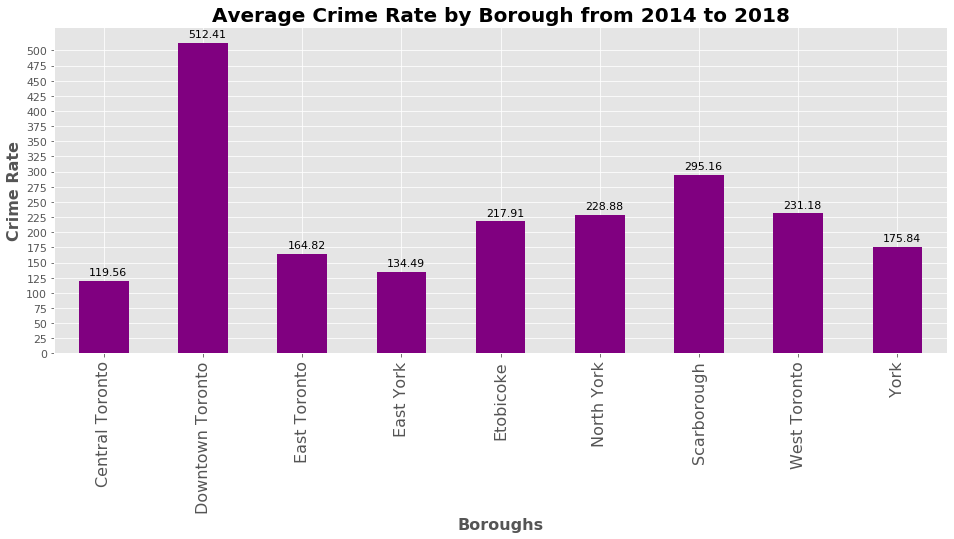

In [123]:
import matplotlib
import matplotlib.pyplot as plt

# get all the Borough names.
borough_labels = ['Central Toronto', 'Downtown Toronto', 'East Toronto', 'East York', 'Etobicoke', 'North York', 'Scarborough', 'West Toronto', 'York']

plt.style.use('ggplot')
%matplotlib inline

ax = avg_crime_by_borough_df['Total Crime'].plot(kind='bar',
              figsize=(16, 6), color=['purple'], fontsize=11);

ax.set_alpha(0.8)
ax.set_title('Average Crime Rate by Borough from 2014 to 2018', fontweight='bold', fontsize=20)
ax.set_ylabel('Crime Rate', fontweight='bold', fontsize=16)
ax.set_xlabel('Boroughs', fontweight='bold', fontsize=16)
ax.set_yticks([0, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400, 425, 450, 475, 500])
ax.set_xticklabels(borough_labels, rotation='vertical', fontsize=16)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+0.1, i.get_height()+9, \
            str(round((i.get_height()), 2)), fontsize=11)      

plt.show()

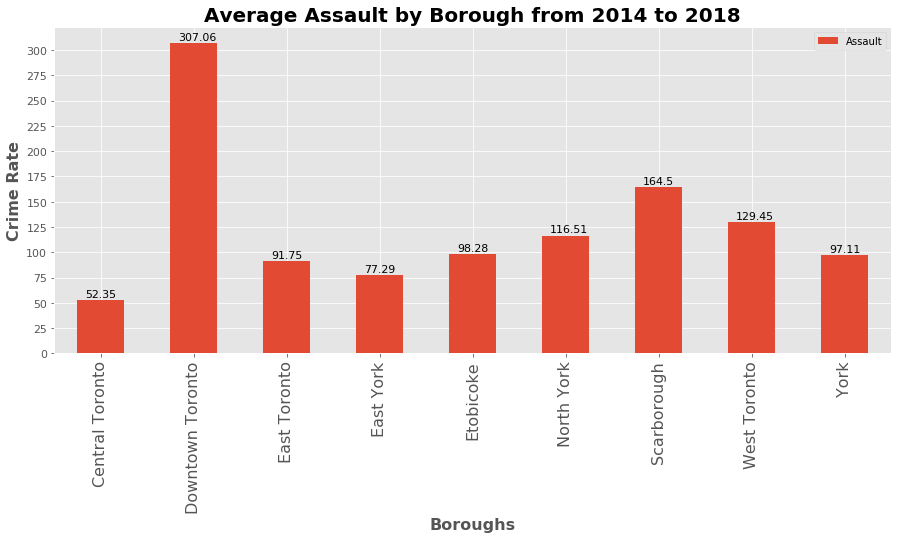

In [124]:
ax = avg_crime_by_borough_df[['Assault']].plot(kind='bar',
              figsize=(15, 6), color=['#E24A33'], fontsize=11);

ax.set_alpha(0.8)
ax.set_title('Average Assault by Borough from 2014 to 2018', fontweight='bold', fontsize=20)
ax.set_ylabel('Crime Rate', fontweight='bold', fontsize=16)
ax.set_xlabel('Boroughs', fontweight='bold', fontsize=16)
ax.set_yticks([0, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, 300])
ax.set_xticklabels(borough_labels, rotation='vertical', fontsize=16)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+i.get_width()/6, i.get_height()+3, \
            str(round((i.get_height()), 2)), fontsize=11)      

plt.show()

**Central Toronto** has the lowest rate in **Assault**. **East York** is the 2nd runner up with the second lowest rate in Assault.

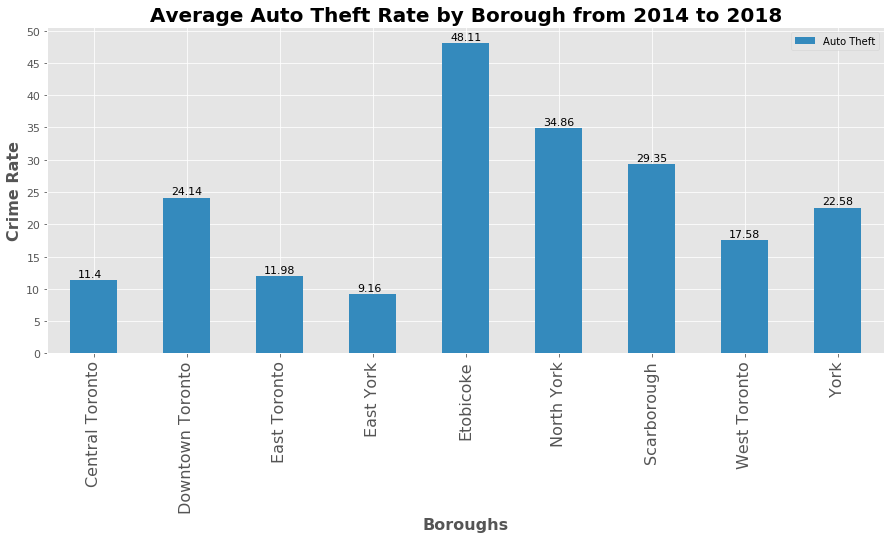

In [125]:
ax = avg_crime_by_borough_df[['Auto Theft']].plot(kind='bar',
              figsize=(15, 6), color=['#348ABD'], fontsize=11);

ax.set_alpha(0.8)
ax.set_title('Average Auto Theft Rate by Borough from 2014 to 2018', fontweight='bold', fontsize=20)
ax.set_ylabel('Crime Rate', fontweight='bold', fontsize=16)
ax.set_xlabel('Boroughs', fontweight='bold', fontsize=16)
ax.set_yticks([0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])
ax.set_xticklabels(borough_labels, rotation='vertical', fontsize=16)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+i.get_width()/6, i.get_height()+0.5, \
            str(round((i.get_height()), 2)), fontsize=11)      

plt.show()

**East York** has loweset rate in **Auto Theft**. **Central Toronto** has the second lowest rate in Auto Theft.

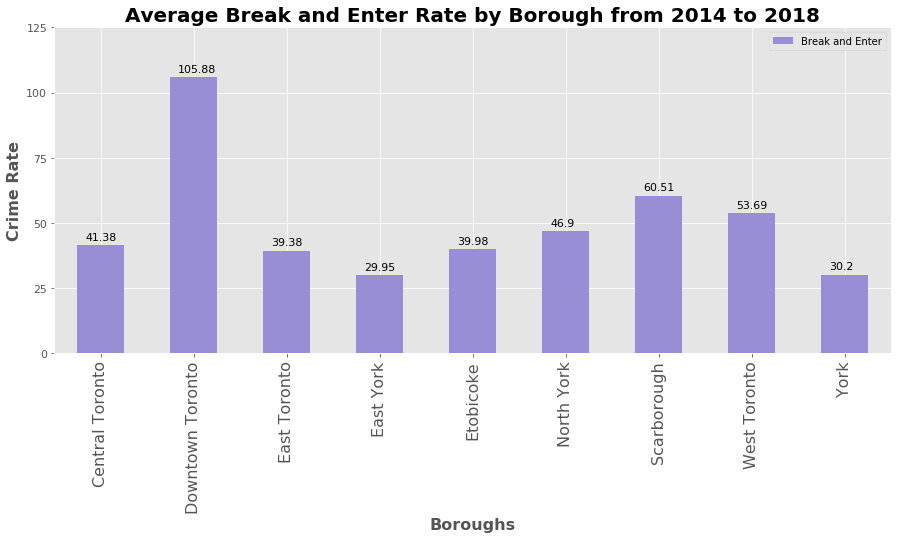

In [126]:
ax = avg_crime_by_borough_df[['Break and Enter']].plot(kind='bar',
              figsize=(15, 6), color=['#988ED5'], fontsize=11);

ax.set_alpha(0.8)
ax.set_title('Average Break and Enter Rate by Borough from 2014 to 2018', fontweight='bold', fontsize=20)
ax.set_ylabel('Crime Rate', fontweight='bold', fontsize=16)
ax.set_xlabel('Boroughs', fontweight='bold', fontsize=16)
ax.set_yticks([0, 25, 50, 75, 100, 125])
ax.set_xticklabels(borough_labels, rotation='vertical', fontsize=16)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+i.get_width()/6, i.get_height()+2, \
            str(round((i.get_height()), 2)), fontsize=11)      

plt.show()

**East York** has the lowest rate in **Break and Enter**. **York** is the second runner up with the second lowest rate in Break and Enter.

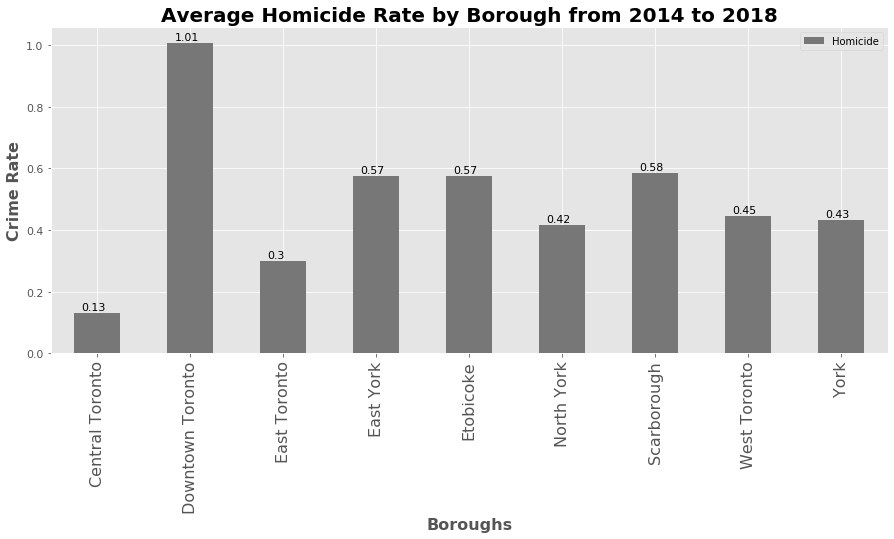

In [127]:
ax = avg_crime_by_borough_df[['Homicide']].plot(kind='bar',
              figsize=(15, 6), color=['#777777'], fontsize=11);

ax.set_alpha(0.8)
ax.set_title('Average Homicide Rate by Borough from 2014 to 2018', fontweight='bold', fontsize=20)
ax.set_ylabel('Crime Rate', fontweight='bold', fontsize=16)
ax.set_xlabel('Boroughs', fontweight='bold', fontsize=16)
ax.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
ax.set_xticklabels(borough_labels, rotation='vertical', fontsize=16)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+i.get_width()/6, i.get_height()+0.01, \
            str(round((i.get_height()), 2)), fontsize=11)      

plt.show()

**Central Toronto** has the lowest rate in **Homicide**.

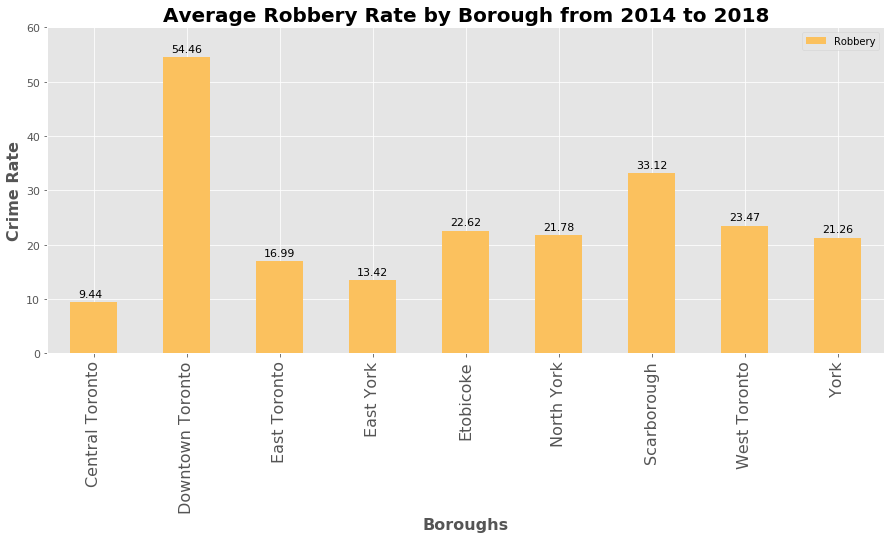

In [128]:
ax = avg_crime_by_borough_df[['Robbery']].plot(kind='bar',
              figsize=(15, 6), color=['#FBC15E'], fontsize=11);

ax.set_alpha(0.8)
ax.set_title('Average Robbery Rate by Borough from 2014 to 2018', fontweight='bold', fontsize=20)
ax.set_ylabel('Crime Rate', fontweight='bold', fontsize=16)
ax.set_xlabel('Boroughs', fontweight='bold', fontsize=16)
ax.set_yticks([0, 10, 20, 30, 40, 50, 60])
ax.set_xticklabels(borough_labels, rotation='vertical', fontsize=16)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+i.get_width()/6, i.get_height()+1, \
            str(round((i.get_height()), 2)), fontsize=11)      

plt.show()

**Central Toronto** has the lowest rate in **Robbery**. **East York** has the second lowest rate in Robbery.

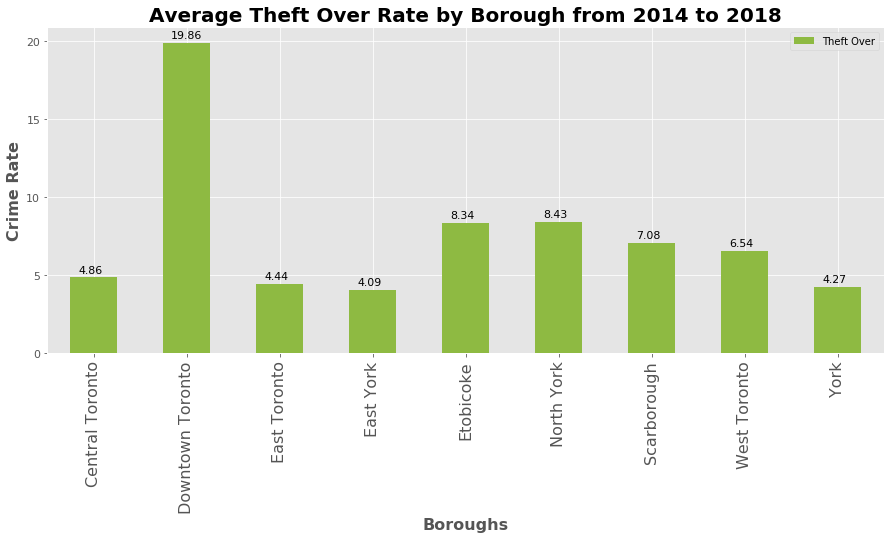

In [129]:
ax = avg_crime_by_borough_df[['Theft Over']].plot(kind='bar',
              figsize=(15, 6), color=['#8EBA42'], fontsize=11);

ax.set_alpha(0.8)
ax.set_title('Average Theft Over Rate by Borough from 2014 to 2018', fontweight='bold', fontsize=20)
ax.set_ylabel('Crime Rate', fontweight='bold', fontsize=16)
ax.set_xlabel('Boroughs', fontweight='bold', fontsize=16)
ax.set_yticks([0, 5, 10, 15, 20])
ax.set_xticklabels(borough_labels, rotation='vertical', fontsize=16)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+i.get_width()/6, i.get_height()+0.3, \
            str(round((i.get_height()), 2)), fontsize=11)      

plt.show()

**East York** has the lowest rate in **Theft Over**.

### Observation Top Safest Boroughs (1 - Safest / Lowest Crime Rate) :
|**Rank**|**Assault**|**Auto Theft**|**Break and Enter**|**Homicide**|**Robbery**|**Theft Over**|
|---|---|---|---|---|---|---|
|**1**|Central Toronto|East York|York|Central Toronto|Central Toronto|East York|
|**2**|East York|Cental Toronto|York|East Toronto|East York|York|
|**3**|East Toronto|East Toronto|East Toronto|North York|East Toronto|East Toronto|


- **1. Central Toronto** 
- **2. East York** 
- **3. East Toronto**

**_Find the neighborhoods in Central Toronto and East York that have population over the average in Toronto_**

In [38]:
print("Average Population of Toronto Neighborhoods: {}".format(to_crime_df['Population'].mean()))

Average Population of Toronto Neighborhoods: 19511.22142857143


In [39]:
po_above_avg_df = to_crime_df.loc[to_crime_df['Population'] >= to_crime_df['Population'].mean()]
print("{} Neighborhoods have population above the average population of all Toronto Neighborhoods.".format(po_above_avg_df.shape[0]))

55 Neighborhoods have population above the average population of all Toronto Neighborhoods.


### Safest Neighborhoods in Toronto, specifically in Central Toronto, East Toronto and East York boroughs are:


In [40]:
po_above_avg_df.sort_values(by=['Borough','Population'], ascending=True, inplace=True)
population_by_borough_df = po_above_avg_df[['Borough','Neighborhood', 'Postal_Code', 'Population', 'LONGITUDE', 'LATITUDE']]

print('Neighborhood in Central Toronto has above average in population:')
safest_neighborhoods_df = population_by_borough_df.loc[population_by_borough_df['Borough'].isin(['Central Toronto', 'East Toronto','East York'])]
safest_neighborhoods_df

Neighborhood in Central Toronto has above average in population:


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Borough,Neighborhood,Postal_Code,Population,LONGITUDE,LATITUDE
47,Central Toronto,Mount Pleasant West,M4S,29658,-79.393360,43.704435
126,East Toronto,East End-Danforth,M4E,21381,-79.299359,43.684174
91,East Toronto,The Beaches,M4L,21567,-79.299601,43.671050
94,East York,Thorncliffe Park,M4H,21108,-79.349984,43.707749


In [41]:
print("Number of Neighborhoods in Central Toronto: {}".format(len(to_crime_df[to_crime_df['Borough']=='Central Toronto'])))
print("Number of Neighborhoods in East Toronto: {}".format(len(to_crime_df[to_crime_df['Borough']=='East Toronto'])))
print("Number of Neighborhoods in East York: {}".format(len(to_crime_df[to_crime_df['Borough']=='East York'])))

Number of Neighborhoods in Central Toronto: 10
Number of Neighborhoods in East Toronto: 8
Number of Neighborhoods in East York: 8


**_Analysis:_**: The safest neighborhoods in Toronto with the above average population are:

- Mount Pleasant West in Central Toronto
- The Beaches, East End-Danforth in East Toronto
- Thhorncliffe Park in East York

**Datasource 3: Toronto Neighborhoods Venue Data using FourSquare API**
We will retrieve the venues in each neighborhood and filter to include on the parks, restaurants and bars.

In [42]:
import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Libraries imported.


- **_Narrow down to looking into the safest neighborhoods in Central Toronto, East Toronto and East York areas_**: 

In [44]:
CLIENT_ID = 'M3TP0FJWPAZBZ2MZYP2HEADNNCCJ3ZQAELGDKT1IUNYBCF0R' # your Foursquare ID
CLIENT_SECRET = '4TWWXMOAAMJVFWLHRQGVNYCVNU5WPEMZ3YW1DW5TABXSGTTM' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: M3TP0FJWPAZBZ2MZYP2HEADNNCCJ3ZQAELGDKT1IUNYBCF0R
CLIENT_SECRET:4TWWXMOAAMJVFWLHRQGVNYCVNU5WPEMZ3YW1DW5TABXSGTTM


In [45]:
# Get the URL from FourSquare for Toronto Borough
limit = 100
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    location.latitude, 
    location.longitude, 
    radius, 
    limit)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=M3TP0FJWPAZBZ2MZYP2HEADNNCCJ3ZQAELGDKT1IUNYBCF0R&client_secret=4TWWXMOAAMJVFWLHRQGVNYCVNU5WPEMZ3YW1DW5TABXSGTTM&v=20180605&ll=43.6534817,-79.3839347&radius=500&limit=100'

In [46]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            limit)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

###  **Explore the 3 safest boroughs**

In [47]:
# get the merged dataframe for the 3 safest neighborhoods
safest_boroughs_df = to_merged_df.loc[to_merged_df['Borough'].isin(['Central Toronto', 'East Toronto','East York'])]
safest_boroughs_df

,Neighborhood_ID,Neighborhood,LONGITUDE,LATITUDE,Postal_Code,Borough
3,100,Yonge-Eglinton,-79.403590,43.704689,M4R,Central Toronto
4,103,Lawrence Park South,-79.406039,43.717212,M4R,Central Toronto
5,97,Yonge-St.Clair,-79.397871,43.687859,M4V,Central Toronto
6,96,Casa Loma,-79.408007,43.681852,M4V,Central Toronto
17,105,Lawrence Park North,-79.403978,43.730060,M4N,Central Toronto
18,41,Bridle Path-Sunnybrook-York Mills,-79.378904,43.731013,M4N,Central Toronto
19,56,Leaside-Bennington,-79.366072,43.703797,M4G,East York
46,99,Mount Pleasant East,-79.384924,43.704852,M4S,Central Toronto
47,104,Mount Pleasant West,-79.393360,43.704435,M4S,Central Toronto
52,68,North Riverdale,-79.351260,43.671995,M4K,East Toronto


In [48]:
safest_boroughs_venues = getNearbyVenues(names=safest_boroughs_df['Neighborhood'], 
                            latitudes=safest_boroughs_df['LATITUDE'],
                            longitudes=safest_boroughs_df['LONGITUDE'])

Yonge-Eglinton
Lawrence Park South
Yonge-St.Clair
Casa Loma
Lawrence Park North
Bridle Path-Sunnybrook-York Mills
Leaside-Bennington
Mount Pleasant East
Mount Pleasant West
North Riverdale
Playter Estates-Danforth
Broadview North
Danforth East York
O'Connor-Parkview
Old East York
Blake-Jones
Danforth
Taylor-Massey
Woodbine-Lumsden
The Beaches
Woodbine Corridor
Greenwood-Coxwell
Thorncliffe Park
University
East End-Danforth
Forest Hill South


In [49]:
safest_boroughs_venues.head(20)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Yonge-Eglinton,43.704689,-79.40359,North Toronto Memorial Community Centre,43.706098,-79.404337,Gym
1,Yonge-Eglinton,43.704689,-79.40359,Burger Shack,43.704855,-79.406067,Burger Joint
2,Yonge-Eglinton,43.704689,-79.40359,Eglinton Park,43.707430,-79.405359,Park
3,Yonge-Eglinton,43.704689,-79.40359,DeSerres,43.705988,-79.402233,Arts & Crafts Store
4,Yonge-Eglinton,43.704689,-79.40359,Yonge Eglinton Square,43.706864,-79.398751,Plaza
5,Yonge-Eglinton,43.704689,-79.40359,Sake Bar Kushi,43.704923,-79.406954,Japanese Restaurant
6,Yonge-Eglinton,43.704689,-79.40359,The Keg Steakhouse + Bar - Yonge + Eglinton,43.705702,-79.397905,Restaurant
7,Yonge-Eglinton,43.704689,-79.40359,Boom Breakfast & Co.,43.705748,-79.403482,Breakfast Spot
8,Yonge-Eglinton,43.704689,-79.40359,SXS Fitness Inc.,43.704774,-79.406466,Gym / Fitness Center
9,Yonge-Eglinton,43.704689,-79.40359,North Toronto Memorial Arena,43.707123,-79.404662,Skating Rink


In [54]:
# Number of venues in the 3 boroughs
safest_boroughs_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Blake-Jones,16,16,16,16,16,16
Bridle Path-Sunnybrook-York Mills,7,7,7,7,7,7
Broadview North,4,4,4,4,4,4
Casa Loma,12,12,12,12,12,12
Lawrence Park North,46,46,46,46,46,46
Lawrence Park South,8,8,8,8,8,8
Leaside-Bennington,19,19,19,19,19,19
Mount Pleasant East,27,27,27,27,27,27
Mount Pleasant West,69,69,69,69,69,69


In [50]:
# Number of unique venues in the 3 Boroughs
print('There are {} unique venu categories.'.format(len(safest_boroughs_venues['Venue Category'].unique())))

There are 160 unique venu categories.


In [52]:
# analyze each neighborhood
safest_boroughs_onehot = pd.get_dummies(safest_boroughs_venues[['Venue Category']], prefix="", prefix_sep="")

# add the Nighborhood column back to dataframe
safest_boroughs_onehot['Neighborhood'] = safest_boroughs_venues['Neighborhood']

# move neighborhood column to the first column
fixed_columns = [safest_boroughs_onehot.columns[-1]] + list(safest_boroughs_onehot.columns[:-1])
safest_boroughs_onehot = safest_boroughs_onehot[fixed_columns]

safest_boroughs_onehot.head()

,Neighborhood,American Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bank,...,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Yoga Studio
0,Yonge-Eglinton,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Yonge-Eglinton,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Yonge-Eglinton,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Yonge-Eglinton,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Yonge-Eglinton,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
# examin the new dataframe size
safest_boroughs_onehot.shape

(583, 161)

In [55]:
# group the rows by neighborhood and look at the mean of the frequency of ocurrence of each category
safest_boroughs_grouped = safest_boroughs_onehot.groupby('Neighborhood').mean().reset_index()
safest_boroughs_grouped

,Neighborhood,American Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bagel Shop,Bakery,Bank,...,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Yoga Studio
0,Blake-Jones,0.000000,0.000000,0.000,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.062500,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
1,Bridle Path-Sunnybrook-York Mills,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.142857,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
2,Broadview North,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
3,Casa Loma,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
4,Danforth,0.068966,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
5,Danforth East York,0.000000,0.000000,0.000,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
6,East End-Danforth,0.000000,0.000000,0.000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.083333,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
7,Forest Hill South,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
8,Greenwood-Coxwell,0.000000,0.027027,0.000,0.027027,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.027027,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
9,Lawrence Park North,0.000000,0.000000,0.000,0.043478,0.000000,0.021739,0.000000,0.065217,0.043478,...,0.000000,0.021739,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000


In [56]:
# confirm the new size
safest_boroughs_grouped.shape

(26, 161)

In [57]:
# Show the top 5 most common venues for each neighborhood
num_top_venues = 5
for hood in safest_boroughs_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = safest_boroughs_grouped[safest_boroughs_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['Venue', 'freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq' : 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Blake-Jones----
                Venue  freq
0                Café  0.19
1         Coffee Shop  0.12
2              Hostel  0.06
3    Toy / Game Store  0.06
4  Dim Sum Restaurant  0.06


----Bridle Path-Sunnybrook-York Mills----
          Venue  freq
0   Coffee Shop  0.14
1  College Quad  0.14
2      Bus Line  0.14
3    Restaurant  0.14
4         Trail  0.14


----Broadview North----
                 Venue  freq
0              Theater  0.25
1          Pizza Place  0.25
2               Bakery  0.25
3       Discount Store  0.25
4  American Restaurant  0.00


----Casa Loma----
                        Venue  freq
0                        Park  0.25
1              History Museum  0.17
2  Modern European Restaurant  0.08
3                  Steakhouse  0.08
4               Historic Site  0.08


----Danforth----
                  Venue  freq
0                  Café  0.10
1  Ethiopian Restaurant  0.10
2           Coffee Shop  0.10
3   American Restaurant  0.07
4         Grocery Store  0.03



In [58]:
# function to sort the venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [59]:
# create dataframe to dislay the top 10 venues for each neighborhood.
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to the number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))
        
# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = safest_boroughs_grouped['Neighborhood']

for ind in np.arange(safest_boroughs_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(safest_boroughs_grouped.iloc[ind, :], num_top_venues)
    
neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Blake-Jones,Café,Coffee Shop,Nail Salon,Dim Sum Restaurant,Diner,Beer Bar,Gastropub,Toy / Game Store,Pizza Place,Asian Restaurant
1,Bridle Path-Sunnybrook-York Mills,Restaurant,College Quad,Gym / Fitness Center,Bus Line,Café,Coffee Shop,Trail,Yoga Studio,Dog Run,Discount Store
2,Broadview North,Pizza Place,Bakery,Discount Store,Theater,Cosmetics Shop,Dessert Shop,Egyptian Restaurant,Donut Shop,Dog Run,Concert Hall
3,Casa Loma,Park,History Museum,Historic Site,Café,Steakhouse,Bistro,Museum,Castle,Modern European Restaurant,Diner
4,Danforth,Coffee Shop,Café,Ethiopian Restaurant,American Restaurant,Beer Store,Pizza Place,Dessert Shop,Middle Eastern Restaurant,Mexican Restaurant,Rental Car Location
5,Danforth East York,Convenience Store,Athletics & Sports,Italian Restaurant,Coffee Shop,Farmers Market,Park,Dim Sum Restaurant,Ethiopian Restaurant,Egyptian Restaurant,Donut Shop
6,East End-Danforth,Dog Run,Skating Rink,Grocery Store,Sandwich Place,Train Station,BBQ Joint,Coffee Shop,Light Rail Station,Mexican Restaurant,Caribbean Restaurant
7,Forest Hill South,Playground,Park,Yoga Studio,Deli / Bodega,Donut Shop,Dog Run,Discount Store,Diner,Dim Sum Restaurant,Dessert Shop
8,Greenwood-Coxwell,Indian Restaurant,Café,Grocery Store,Convenience Store,Brewery,Gym,Indian Chinese Restaurant,Sandwich Place,Diner,Shopping Plaza
9,Lawrence Park North,Sushi Restaurant,Italian Restaurant,Bakery,Coffee Shop,Pub,Bank,Sandwich Place,Fast Food Restaurant,Asian Restaurant,Pizza Place


- **_Cluster Neighborhoods into 3 clusters by running k-means_**

In [60]:
# set number of clusters
kclusters = 3

safest_boroughs_grouped_clustering = safest_boroughs_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(safest_boroughs_grouped_clustering)

# check cluster Labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1], dtype=int32)

In [61]:
# create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

safest_boroughs_merged = safest_boroughs_df

# merge safest_boroughs_grouped with safest_boroughs_df to add lattitude/longitude for each neighborhood
safest_boroughs_merged = safest_boroughs_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

safest_boroughs_merged.head()

,Neighborhood_ID,Neighborhood,LONGITUDE,LATITUDE,Postal_Code,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,100,Yonge-Eglinton,-79.403590,43.704689,M4R,Central Toronto,1,Coffee Shop,Fast Food Restaurant,Movie Theater,Gym,Restaurant,Supermarket,Sandwich Place,Burger Joint,Shopping Mall,Buffet
4,103,Lawrence Park South,-79.406039,43.717212,M4R,Central Toronto,1,Sporting Goods Shop,Spa,Ice Cream Shop,Coffee Shop,Clothing Store,Flower Shop,Chinese Restaurant,Dessert Shop,Donut Shop,Dog Run
5,97,Yonge-St.Clair,-79.397871,43.687859,M4V,Central Toronto,1,Coffee Shop,Italian Restaurant,Sushi Restaurant,Grocery Store,Gym,Sandwich Place,Thai Restaurant,Restaurant,Café,Pharmacy
6,96,Casa Loma,-79.408007,43.681852,M4V,Central Toronto,0,Park,History Museum,Historic Site,Café,Steakhouse,Bistro,Museum,Castle,Modern European Restaurant,Diner
17,105,Lawrence Park North,-79.403978,43.730060,M4N,Central Toronto,1,Sushi Restaurant,Italian Restaurant,Bakery,Coffee Shop,Pub,Bank,Sandwich Place,Fast Food Restaurant,Asian Restaurant,Pizza Place


In [62]:
# Visualizing the resulting clusters
map_clusters = folium.Map(location=[location.latitude, location.longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(safest_boroughs_merged['LATITUDE'], safest_boroughs_merged['LONGITUDE'], safest_boroughs_merged['Neighborhood'], safest_boroughs_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

map_clusters

In [63]:
# Examine Clusters and determine the discriminating venue categories that distinguish each cluster.
# Cluster 1
safest_boroughs_merged.loc[safest_boroughs_merged['Cluster Labels'] == 0, safest_boroughs_merged.columns[[1] + list(range(5, safest_boroughs_merged.shape[1]))]]

,Neighborhood,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,Casa Loma,Central Toronto,0,Park,History Museum,Historic Site,Café,Steakhouse,Bistro,Museum,Castle,Modern European Restaurant,Diner
52,North Riverdale,East Toronto,0,Park,Café,Dog Run,Pool,Yoga Studio,Department Store,Donut Shop,Discount Store,Diner,Dim Sum Restaurant
89,Taylor-Massey,East York,0,Theater,Convenience Store,Park,Poutine Place,Deli / Bodega,Donut Shop,Dog Run,Discount Store,Diner,Dim Sum Restaurant
90,Woodbine-Lumsden,East York,0,Park,Skating Rink,Spa,Video Store,Convenience Store,Curling Ice,Beer Store,Dim Sum Restaurant,Egyptian Restaurant,Donut Shop
130,Forest Hill South,Central Toronto,0,Playground,Park,Yoga Studio,Deli / Bodega,Donut Shop,Dog Run,Discount Store,Diner,Dim Sum Restaurant,Dessert Shop


In [64]:
# Cluster 2
safest_boroughs_merged.loc[safest_boroughs_merged['Cluster Labels'] == 1, safest_boroughs_merged.columns[[1] + list(range(5, safest_boroughs_merged.shape[1]))]]

,Neighborhood,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Yonge-Eglinton,Central Toronto,1,Coffee Shop,Fast Food Restaurant,Movie Theater,Gym,Restaurant,Supermarket,Sandwich Place,Burger Joint,Shopping Mall,Buffet
4,Lawrence Park South,Central Toronto,1,Sporting Goods Shop,Spa,Ice Cream Shop,Coffee Shop,Clothing Store,Flower Shop,Chinese Restaurant,Dessert Shop,Donut Shop,Dog Run
5,Yonge-St.Clair,Central Toronto,1,Coffee Shop,Italian Restaurant,Sushi Restaurant,Grocery Store,Gym,Sandwich Place,Thai Restaurant,Restaurant,Café,Pharmacy
17,Lawrence Park North,Central Toronto,1,Sushi Restaurant,Italian Restaurant,Bakery,Coffee Shop,Pub,Bank,Sandwich Place,Fast Food Restaurant,Asian Restaurant,Pizza Place
18,Bridle Path-Sunnybrook-York Mills,Central Toronto,1,Restaurant,College Quad,Gym / Fitness Center,Bus Line,Café,Coffee Shop,Trail,Yoga Studio,Dog Run,Discount Store
19,Leaside-Bennington,East York,1,Coffee Shop,Middle Eastern Restaurant,Bike Shop,Burger Joint,Shopping Mall,Skating Rink,Dessert Shop,Brewery,Sporting Goods Shop,Mexican Restaurant
46,Mount Pleasant East,Central Toronto,1,Dessert Shop,Pizza Place,Sandwich Place,Café,Coffee Shop,Gym,Italian Restaurant,American Restaurant,Diner,Restaurant
47,Mount Pleasant West,Central Toronto,1,Coffee Shop,Italian Restaurant,Café,Sushi Restaurant,Pizza Place,Dessert Shop,Gym,Indian Restaurant,Middle Eastern Restaurant,Bar
53,Playter Estates-Danforth,East Toronto,1,Greek Restaurant,Pub,Yoga Studio,Café,Italian Restaurant,Coffee Shop,Ice Cream Shop,Restaurant,Fruit & Vegetable Store,Pet Store
54,Broadview North,East Toronto,1,Pizza Place,Bakery,Discount Store,Theater,Cosmetics Shop,Dessert Shop,Egyptian Restaurant,Donut Shop,Dog Run,Concert Hall


In [65]:
# Cluster 3
safest_boroughs_merged.loc[safest_boroughs_merged['Cluster Labels'] == 2, safest_boroughs_merged.columns[[1] + list(range(5, safest_boroughs_merged.shape[1]))]]

,Neighborhood,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
92,Woodbine Corridor,East Toronto,2,Playground,Café,Grocery Store,Baseball Field,Yoga Studio,Department Store,Donut Shop,Dog Run,Discount Store,Diner


In [122]:
# top 10 venues for the 3 safest neighborhoods
cluster_2_df = safest_boroughs_merged.loc[safest_boroughs_merged['Cluster Labels'] == 1, safest_boroughs_merged.columns[[1] + list(range(5, safest_boroughs_merged.shape[1]))]]
safest_neighbourhood_venues_df = cluster_2_df.loc[cluster_2_df['Neighborhood'].isin(['Mount Pleasant West', 'East End-Danforth', 'The Beaches','Thorncliffe Park'])]
safest_neighbourhood_venues_df                    

,Neighborhood,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
47,Mount Pleasant West,Central Toronto,1,Coffee Shop,Italian Restaurant,Café,Sushi Restaurant,Pizza Place,Dessert Shop,Gym,Indian Restaurant,Middle Eastern Restaurant,Bar
91,The Beaches,East Toronto,1,Japanese Restaurant,Park,Coffee Shop,Café,Pub,Pizza Place,Bar,BBQ Joint,Liquor Store,Cheese Shop
94,Thorncliffe Park,East York,1,Indian Restaurant,Sandwich Place,Yoga Studio,Supermarket,Grocery Store,Warehouse Store,Gas Station,Fast Food Restaurant,Liquor Store,Discount Store
126,East End-Danforth,East Toronto,1,Dog Run,Skating Rink,Grocery Store,Sandwich Place,Train Station,BBQ Joint,Coffee Shop,Light Rail Station,Mexican Restaurant,Caribbean Restaurant


Looking into venues in these areas and comparing numbers of Restaurants, Bars and Parks.

1. Get the venues in the two neighborhoods
2. Find the number of restaurants
3. Find the number of bars
4. Find the number of Parks
5. Compare the two neighborhoods to determine which neigborhood satisfies the criteria for the problem we are trying to solve.

**Central Toronto** - Mount Pleasant West

In [93]:
# Obtain geo coordinates for the safest neighborhood in Central Toronto 
ct_latitude = safest_neighborhoods_df['LATITUDE'][safest_neighborhoods_df.Borough == 'Central Toronto'].values[0]
ct_longitude = safest_neighborhoods_df['LONGITUDE'][safest_neighborhoods_df.Borough == 'Central Toronto'].values[0]

In [94]:
# Get the URL from FourSquare for Central Toronto Borough
limit = 100
radius = 500
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    ct_latitude, 
    ct_longitude, 
    radius, 
    limit)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=M3TP0FJWPAZBZ2MZYP2HEADNNCCJ3ZQAELGDKT1IUNYBCF0R&client_secret=4TWWXMOAAMJVFWLHRQGVNYCVNU5WPEMZ3YW1DW5TABXSGTTM&v=20180605&ll=43.7044351706,-79.393359554&radius=500&limit=100'

In [95]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f38113688ec7f202bed820b'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Davisville',
  'headerFullLocation': 'Davisville, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 69,
  'suggestedBounds': {'ne': {'lat': 43.7089351751, 'lng': -79.38714636049947},
   'sw': {'lat': 43.6999351661, 'lng': -79.39957274750053}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '5bdcf092cb3fd2002c311f71',
       'name': 'Bar Buca',
       'location': {'address': '101 Eglinton Ave E',
        'lat': 43.706961,
        'lng': -79.394808,
        'labeledLatLngs': [{'label': 'display',
          'lat': 43.706961,
          'lng': -79.394

In [96]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [97]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues = nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(20)

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Bar Buca,Italian Restaurant,43.706961,-79.394808
1,Loblaws,Supermarket,43.707244,-79.394701
2,Istanbul Cafe & Espresso Bar,Café,43.707891,-79.393049
3,Jules Cafe Patisserie,Dessert Shop,43.704138,-79.388413
4,Thobors Boulangerie Patisserie Café,Café,43.704514,-79.388616
5,Kinton Ramen,Ramen Restaurant,43.707302,-79.395854
6,Fresh,Vegetarian / Vegan Restaurant,43.707324,-79.395649
7,Balsamico,Italian Restaurant,43.701505,-79.397162
8,Little Sister,Indonesian Restaurant,43.701552,-79.397163
9,The Keg Steakhouse + Bar - Yonge + Eglinton,Restaurant,43.705702,-79.397905


In [98]:
# Number of Restaurants in central toronto
print("Number of venues in Mount Pleasant West in Central Toronto: {}".format(nearby_venues.shape[0]))
ct_restaurants = nearby_venues[nearby_venues.categories.str.contains('Restaurant')]
print("Number of Restaurants in Mount Pleasant West in Central Toronto: {}.".format(ct_restaurants.shape[0]))
ct_restaurants

Number of venues in Mount Pleasant West in Central Toronto: 69
Number of Restaurants in Mount Pleasant West in Central Toronto: 24.


,name,categories,lat,lng
0,Bar Buca,Italian Restaurant,43.706961,-79.394808
5,Kinton Ramen,Ramen Restaurant,43.707302,-79.395854
6,Fresh,Vegetarian / Vegan Restaurant,43.707324,-79.395649
7,Balsamico,Italian Restaurant,43.701505,-79.397162
8,Little Sister,Indonesian Restaurant,43.701552,-79.397163
9,The Keg Steakhouse + Bar - Yonge + Eglinton,Restaurant,43.705702,-79.397905
13,B.GOOD,Fast Food Restaurant,43.707127,-79.395801
14,Five Doors North,Italian Restaurant,43.702236,-79.397526
15,Noorden Food x Bar,Restaurant,43.702814,-79.397645
19,Marigold Indian Bistro,Indian Restaurant,43.702881,-79.388008


In [99]:
ct_bars = nearby_venues[nearby_venues.categories.str.contains('Bar')]
print("Number of Bars in Mount Pleasant West in Central Toronto: {}.".format(ct_bars.shape[0]))
ct_bars

Number of Bars in Mount Pleasant West in Central Toronto: 2.


,name,categories,lat,lng
25,St. Louis Bar & Grill,Bar,43.701561,-79.397558
30,Good Fortune,Bar,43.708070,-79.394380


In [100]:
ct_parks = nearby_venues[nearby_venues.categories.str.contains('Park')]
print("Number of Parks in Mount Pleasant West in Central Toronto: {}.".format(ct_parks.shape[0]))
ct_parks

Number of Parks in Mount Pleasant West in Central Toronto: 0.


,name,categories,lat,lng


**East Toronto** - The Beaches

In [130]:
et1_latitude = safest_neighborhoods_df['LATITUDE'][safest_neighborhoods_df.Neighborhood == 'The Beaches'].values[0]
et1_longitude = safest_neighborhoods_df['LONGITUDE'][safest_neighborhoods_df.Neighborhood == 'The Beaches'].values[0]

In [138]:
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    et1_latitude, 
    et1_longitude, 
    radius, 
    limit)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=M3TP0FJWPAZBZ2MZYP2HEADNNCCJ3ZQAELGDKT1IUNYBCF0R&client_secret=4TWWXMOAAMJVFWLHRQGVNYCVNU5WPEMZ3YW1DW5TABXSGTTM&v=20180605&ll=43.6710499931,-79.2996013043&radius=500&limit=100'

In [139]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f383432dd2e0829bb03bad5'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'The Beaches',
  'headerFullLocation': 'The Beaches, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 50,
  'suggestedBounds': {'ne': {'lat': 43.6755499976, 'lng': -79.29339156800076},
   'sw': {'lat': 43.666549988599996, 'lng': -79.30581104059924}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4bae1ed7f964a520ba863be3',
       'name': 'Kew Gardens',
       'location': {'address': '2075 Queen Street East',
        'crossStreet': 'btwn Waverly Rd. & Lee Ave.',
        'lat': 43.66903821389327,
        'lng': -79.29853750338029,
        'labeled

In [140]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues = nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(20)

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Kew Gardens,Park,43.669038,-79.298538
1,The Ten Spot,Nail Salon,43.670340,-79.299363
2,Hogtown Smoke,BBQ Joint,43.669573,-79.302151
3,Buds Coffee Bar,Coffee Shop,43.669375,-79.303218
4,LCBO,Liquor Store,43.669993,-79.300383
5,Kew Gardens Play Park,Park,43.669267,-79.299684
6,Bam Breakfast and Bistro,Breakfast Spot,43.669724,-79.301503
7,Sunset Grill,Diner,43.670214,-79.299653
8,Green Eggplant,Mediterranean Restaurant,43.670517,-79.298660
9,Mastermind Toys,Toy / Game Store,43.671453,-79.293971


In [141]:
# Number of Restaurants in East toronto - The Beaches
print("Number of venues in The Beaches in East Toronto: {}".format(nearby_venues.shape[0]))
et1_restaurants = nearby_venues[nearby_venues.categories.str.contains('Restaurant')]
print("Number of Restaurants in The Beaches in East Toronto: {}.".format(et1_restaurants.shape[0]))
et1_restaurants

Number of venues in The Beaches in East Toronto: 50
Number of Restaurants in The Beaches in East Toronto: 7.


,name,categories,lat,lng
8,Green Eggplant,Mediterranean Restaurant,43.670517,-79.298660
16,Yumei Sushi,Japanese Restaurant,43.671108,-79.295064
22,Green Basil,Thai Restaurant,43.671200,-79.294717
25,Bikkuri Japanese Restaurant,Japanese Restaurant,43.670715,-79.296956
28,Souvlaki Hut,Greek Restaurant,43.671048,-79.295758
31,Aki Da Japanese Seafood House,Japanese Restaurant,43.669051,-79.304499
34,The Salty Dog,Restaurant,43.669944,-79.300894


In [142]:
et1_bars = nearby_venues[nearby_venues.categories.str.contains('Bar')]
print("Number of Bars in The Beaches in East Toronto: {}.".format(et1_bars.shape[0]))
et1_bars

Number of Bars in The Beaches in East Toronto: 4.


,name,categories,lat,lng
10,Sanna's Farmacia,Juice Bar,43.670929,-79.295969
17,Castro's Lounge,Bar,43.671104,-79.295107
32,Gabby's Food & Fuel,Bar,43.670809,-79.296657
36,Fiorio Beaches,Salon / Barbershop,43.669913,-79.300529


In [143]:
et1_parks = nearby_venues[nearby_venues.categories.str.contains('Park')]
print("Number of Parks in The Beaches in East Toronto: {}.".format(et1_parks.shape[0]))
et1_parks

Number of Parks in The Beaches in East Toronto: 2.


,name,categories,lat,lng
0,Kew Gardens,Park,43.669038,-79.298538
5,Kew Gardens Play Park,Park,43.669267,-79.299684


**East Toronto** - East End-Danforth

In [158]:
et2_latitude = safest_neighborhoods_df['LATITUDE'][safest_neighborhoods_df.Neighborhood == 'East End-Danforth'].values[0]
et2_longitude = safest_neighborhoods_df['LONGITUDE'][safest_neighborhoods_df.Neighborhood == 'East End-Danforth'].values[0]

In [159]:
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    et2_latitude, 
    et2_longitude, 
    radius, 
    limit)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=M3TP0FJWPAZBZ2MZYP2HEADNNCCJ3ZQAELGDKT1IUNYBCF0R&client_secret=4TWWXMOAAMJVFWLHRQGVNYCVNU5WPEMZ3YW1DW5TABXSGTTM&v=20180605&ll=43.68417388,-79.29935867&radius=500&limit=100'

In [160]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f3835bae48ac773fa93e815'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'East End',
  'headerFullLocation': 'East End, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 12,
  'suggestedBounds': {'ne': {'lat': 43.688673884500005,
    'lng': -79.29314757536754},
   'sw': {'lat': 43.6796738755, 'lng': -79.30556976463247}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '5a7f1cdcb1ec13211e96d84c',
       'name': 'Beach Hill Smokehouse',
       'location': {'address': '172 Main Street S',
        'lat': 43.684105,
        'lng': -79.30041,
        'labeledLatLngs': [{'label': 'display',
          'lat': 43.684105,
        

In [161]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues = nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(20)

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Beach Hill Smokehouse,BBQ Joint,43.684105,-79.300410
1,Ted Reeve Arena,Skating Rink,43.684527,-79.299426
2,Cool Runnings,Caribbean Restaurant,43.683497,-79.300017
3,Grinder,Coffee Shop,43.683073,-79.299875
4,Duckworth's Fish and Chips,Fish & Chips Shop,43.688629,-79.299952
5,Danforth GO Station,Train Station,43.686458,-79.300204
6,Sultan Shawarma & Falafel,Middle Eastern Restaurant,43.688223,-79.301709
7,Subway,Sandwich Place,43.688178,-79.300253
8,TTC Stop #13923,Light Rail Station,43.684072,-79.300062
9,Grillies,Mexican Restaurant,43.688550,-79.300025


In [162]:
print("Number of venues in East End-Danforth in East Toronto: {}".format(nearby_venues.shape[0]))
et2_restaurants = nearby_venues[nearby_venues.categories.str.contains('Restaurant')]
print("Number of Restaurants in East End-Danforth in East Toronto: {}.".format(et2_restaurants.shape[0]))
et2_restaurants

Number of venues in East End-Danforth in East Toronto: 12
Number of Restaurants in East End-Danforth in East Toronto: 3.


,name,categories,lat,lng
2,Cool Runnings,Caribbean Restaurant,43.683497,-79.300017
6,Sultan Shawarma & Falafel,Middle Eastern Restaurant,43.688223,-79.301709
9,Grillies,Mexican Restaurant,43.688550,-79.300025


In [163]:
et2_bars = nearby_venues[nearby_venues.categories.str.contains('Bar')]
print("Number of Bars in East End-Danforth in East Toronto: {}.".format(et2_bars.shape[0]))
et2_bars

Number of Bars in East End-Danforth in East Toronto: 0.


,name,categories,lat,lng


In [164]:
et2_parks = nearby_venues[nearby_venues.categories.str.contains('Park')]
print("Number of Parks in East End-Danforth in East Toronto: {}.".format(et2_parks.shape[0]))
et2_parks

Number of Parks in East End-Danforth in East Toronto: 0.


,name,categories,lat,lng



**East York** - Thornclife

In [151]:
ey_latitude = safest_neighborhoods_df['LATITUDE'][safest_neighborhoods_df.Borough == 'East York'].values[0]
ey_longitude = safest_neighborhoods_df['LONGITUDE'][safest_neighborhoods_df.Borough == 'East York'].values[0]

In [152]:
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    ey_latitude, 
    ey_longitude, 
    radius, 
    limit)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=M3TP0FJWPAZBZ2MZYP2HEADNNCCJ3ZQAELGDKT1IUNYBCF0R&client_secret=4TWWXMOAAMJVFWLHRQGVNYCVNU5WPEMZ3YW1DW5TABXSGTTM&v=20180605&ll=43.7077492119,-79.3499836075&radius=500&limit=100'

In [153]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f38355d1cb0e54c1e0e9059'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Leaside',
  'headerFullLocation': 'Leaside, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 19,
  'suggestedBounds': {'ne': {'lat': 43.712249216400004,
    'lng': -79.34377007048882},
   'sw': {'lat': 43.7032492074, 'lng': -79.35619714451117}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '5b56812a4420d8002c58cefa',
       'name': 'Costco',
       'location': {'address': '46-42 Overlea Blvd',
        'lat': 43.70705091308799,
        'lng': -79.3480933503406,
        'labeledLatLngs': [{'label': 'display',
          'lat': 43.70705091308799,


In [154]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues = nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(20)

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Costco,Warehouse Store,43.707051,-79.348093
1,Iqbal Kebab & Sweet Centre,Indian Restaurant,43.705923,-79.351521
2,Fit4Less,Gym,43.705689,-79.346018
3,Bikram Yoga East York,Yoga Studio,43.705450,-79.351448
4,Shoppers Drug Mart,Pharmacy,43.705810,-79.347044
5,Subway,Sandwich Place,43.704596,-79.349670
6,Hero Certified Burgers,Burger Joint,43.705511,-79.347064
7,Iqbal foods,Grocery Store,43.705751,-79.352054
8,Hakka Garden,Indian Restaurant,43.704578,-79.349770
9,Tim Hortons,Coffee Shop,43.705090,-79.350545


In [155]:
print("Number of venues in Thorncliffe Park in East York: {}".format(nearby_venues.shape[0]))
ey_restaurants = nearby_venues[nearby_venues.categories.str.contains('Restaurant')]
print("Number of Restaurants in Thorncliffe Park in East York: {}.".format(ey_restaurants.shape[0]))
ey_restaurants

Number of venues in Thorncliffe Park in East York: 19
Number of Restaurants in Thorncliffe Park in East York: 4.


,name,categories,lat,lng
1,Iqbal Kebab & Sweet Centre,Indian Restaurant,43.705923,-79.351521
8,Hakka Garden,Indian Restaurant,43.704578,-79.349770
10,A&W,Fast Food Restaurant,43.706275,-79.344670
15,Swiss Chalet,Restaurant,43.707786,-79.344132


In [156]:
ey_bars = nearby_venues[nearby_venues.categories.str.contains('Bar')]
print("Number of Bars in Thorncliffe Park in East York: {}.".format(ey_bars.shape[0]))
ey_bars

Number of Bars in Thorncliffe Park in East York: 0.


,name,categories,lat,lng


In [157]:
ey_parks = nearby_venues[nearby_venues.categories.str.contains('Park')]
print("Number of Parks in Thorncliffe Park in East York: {}.".format(ey_parks.shape[0]))
ey_parks

Number of Parks in Thorncliffe Park in East York: 0.


,name,categories,lat,lng


In [173]:
restaurants = []
bars = []
parks = []

- **_Putting togehter the results of 3 venues in the safest neighborhoods_**

In [174]:
restaurants.append(ct_restaurants.shape[0])
restaurants.append(et2_restaurants.shape[0])
restaurants.append(et1_restaurants.shape[0])
restaurants.append(ey_restaurants.shape[0])
restaurants

[24, 3, 7, 4]

In [175]:
bars.append(ct_bars.shape[0])
bars.append(et2_bars.shape[0])
bars.append(et1_bars.shape[0])
bars.append(ey_bars.shape[0])
bars

[2, 0, 4, 0]

In [176]:
parks.append(ct_parks.shape[0])
parks.append(et2_parks.shape[0])
parks.append(et1_parks.shape[0])
parks.append(ey_parks.shape[0])
parks

[0, 0, 2, 0]

In [178]:
safest_neighborhoods_df['No of Restaurants'] = restaurants
safest_neighborhoods_df['No of Bars'] = bars
safest_neighborhoods_df['No of Parks'] = parks
safest_neighborhoods_df

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

,Borough,Neighborhood,Postal_Code,Population,LONGITUDE,LATITUDE,No of Restaurants,No of Bars,No of Parks
47,Central Toronto,Mount Pleasant West,M4S,29658,-79.393360,43.704435,24,2,0
126,East Toronto,East End-Danforth,M4E,21381,-79.299359,43.684174,3,0,0
91,East Toronto,The Beaches,M4L,21567,-79.299601,43.671050,7,4,2
94,East York,Thorncliffe Park,M4H,21108,-79.349984,43.707749,4,0,0


## Conclusion

The 3 neighborhoods are considered as the safest neighborhoods and have above average population.  For those newcomers who enjoy eating out at the restaurants over going to bars or visiting parks, **Mount Pleasant West** in **Central Toronto** would be a good choice to consider.  If all 3 venues are equally important, The Beaches in East Toronto would be the best choice.